In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [22]:
# [name for name in dir(keras.losses) if not name.startswith("_")]

# 손실함수 Loss
- 형식: ```keras.losses.손실함수(y_true, y_pred)```
- 형식: ```model.compile(loss='손실함수', optimizer, metrics)```

1. `mean_squared_error (mse)`: 수치를 직접 예측할 때 사용함. 예측값과 실제값 사이의 평균 제곱 오차이다. 

2. `binary_crossentropy`: binary 레이블을 예측할 때 사용함. 실제 레이블과 예측 레이블 간 교차 엔트로피 손실을 계산한 값이다.

3. `categorical_crossentropy`: 다중 클래스 레이블일 때 one-hot encoding 형태로 예측할 때 사용함. 모델에서는 마지막에 softmax를 활용해야한다. 이 softmax 결과값과 실측값의 오차를 계산한 값이다.

4. `sparse_categorical_crossentropy`: 다중 클래스 레이블인데 one-hot encoding을 하지 않고 정수값을 그대로 줄 때 사용함. 모델에서 마지막에 softmax를 활용하는 것은 동일하다. 

5. 그 외
`mean_absolute_error / mean_absolute_percentage_error 
mean_squared_logarithmic_error / cosine_proximity
squared_hinge / hinge / categorical_hinge 
logcosh / kullback_leibler_divergence / poisson` 

# sparse categorical crossentropy 적용 예시
- 모델 예측 결과에서는 one-hot encoding 형식으로 확률값이 나옴. (10차원짜리 벡터)
- 학습되는 실제 결과는 정수 레이블 형식으로 학습하게 됨. (0~9사이의 정수

In [15]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

(28, 28)
4


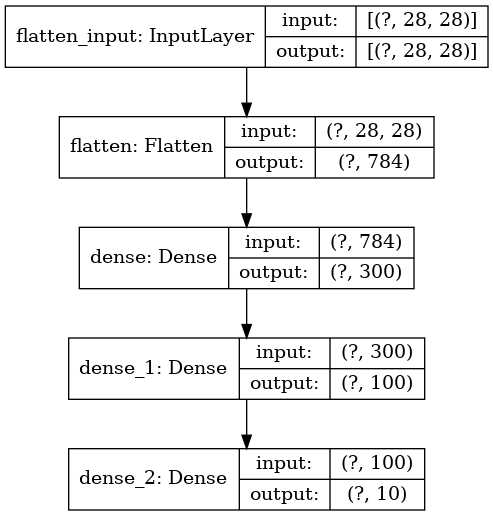

In [16]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))#마지막 레이어는 소프트맥스를 씌워서 10차원 짜리 벡터가 나온다. 

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [17]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

[2021-11-29 07:30:56.296 ip-172-16-7-116:15911 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-11-29 07:30:56.329 ip-172-16-7-116:15911 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.7226 - accuracy: 0.7641 - val_loss: 0.5073 - val_accuracy: 0.8320
Epoch 2/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.4844 - accuracy: 0.8323 - val_loss: 0.4537 - val_accuracy: 0.8492
Epoch 3/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.4413 - accuracy: 0.8465 - val_loss: 0.4382 - val_accuracy: 0.8498
Epoch 4/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.4129 - accuracy: 0.8547 - val_loss: 0.4152 - val_accuracy: 0.8568
Epoch 5/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0

In [21]:
print("===예측결과===")
print(model.predict(X_train[:3]).round(2))
print("===실제결과===")
print(y_train[:3])

===예측결과===
[[0.   0.   0.18 0.   0.21 0.   0.6  0.   0.   0.  ]
 [0.71 0.   0.   0.   0.   0.   0.28 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.84 0.   0.16]]
===실제결과===
[4 0 7]
